In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Preparation

In [2]:
# Read crypto_data.csv into Pandas
crypto_df = pd.read_csv("Resources/crypto_data.csv")
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.shape

(1252, 7)

In [4]:
# Discard all cryptocurrencies that are not being traded
crypto_df = crypto_df[crypto_df.IsTrading !=False]
crypto_df.shape

(1144, 7)

In [5]:
# Drop rows with null values
crypto_df = crypto_df.dropna(how="all")

In [6]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df.TotalCoinsMined >0]
crypto_df.shape

(532, 7)

In [7]:
# Delete the CoinName and unnamed from the original dataframe
crypto_df.drop(columns=["CoinName","Unnamed: 0", "IsTrading"], inplace=True)

In [8]:
crypto_df.shape

(532, 4)

In [9]:
# Drop duplicates if any found
crypto_df.drop_duplicates(subset=None, keep="first", inplace=False, ignore_index=False)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data
crypto_df = pd.get_dummies(crypto_df, columns=["Algorithm","ProofType"])

In [11]:
crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standarize your dataset so that columns that contain larger values do not influence the outcome
sclr = StandardScaler()
scaled_data = sclr.fit_transform(crypto_df)

# Dimensionality Reduction

In [13]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(scaled_data)

In [14]:
# Create a PD dataframe with the new data
crypto_pca_df = pd.DataFrame(data=crypto_pca)

In [16]:
crypto_pca_df.shape

(532, 74)

In [21]:
# further reduce the dataset dimensions with t-SNE and visually inspect the results
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(crypto_pca_df)

/Users/saraharayratti/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [22]:
tsne_features.shape

(532, 2)

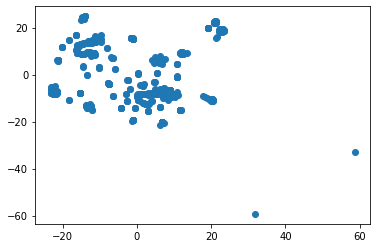

In [29]:
# Create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Cluster Analysis with k-Means

In [30]:
inertia = []
k = list(range(1, 11))

# Use a for-loop to determine the inertia for each k between 1 through 10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

In [31]:
# Create an elbow plot to identify the best number of clusters
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,186829.625000
1,2,108665.617188
2,3,64570.949219
3,4,39528.808594
4,5,30490.818359


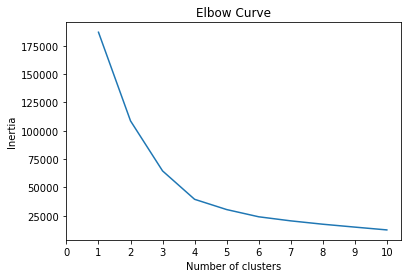

In [34]:
plt.plot(df_elbow ["k"], df_elbow["inertia"])
plt.xticks(list(range(11)))
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [36]:
tsne_df = pd.DataFrame(data=tsne_features)
tsne_df.head()

,0,1
0,-10.557058,14.973090
1,-14.814686,8.583147
2,-15.050592,23.354731
3,23.294622,19.094795
4,-1.126477,-19.314989


In [37]:
# Use K4 to determine the number of clusters
K4model = KMeans(n_clusters=4, random_state=1)
K4model.fit(tsne_df)

KMeans(n_clusters=4, random_state=1)

In [42]:
prediction = K4model.predict(tsne_df)
tsne_df["class"] = K4model.labels_
tsne_df.head()

,0,1,class
0,-10.557058,14.973090,2
1,-14.814686,8.583147,2
2,-15.050592,23.354731,2
3,23.294622,19.094795,1
4,-1.126477,-19.314989,0


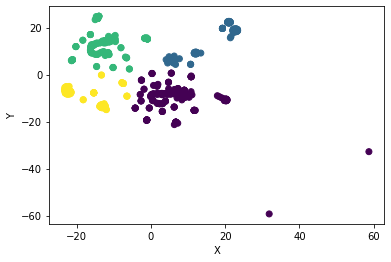

In [43]:
plt.scatter(tsne_df[0], tsne_df[1], c=tsne_df["class"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Brief Analysis
This cryptocurrencies can be cluster based on the above data into 4 clusters. Firtly, in the Tsne Plot the clusters can not be easily identified. However, the elbow of the plot lied on 4 and then as graph above the clusters can be grouped into 4.